In [1]:
%matplotlib inline



In [2]:
#from keras.utils import normalize
import os
import glob
import cv2
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from collections import Counter

In [3]:
#Resizing images, if needed
SIZE_X = 224 
SIZE_Y = 224
n_classes=4 #Number of classes for segmentation
num_images = 12 #Total 1600 available but we can use a subset for speedy training

In [4]:
path= "C:/Users/abden/OneDrive/Desktop/Projects/Projet S8/Untitled Folder/img_med/Data/dataset/train_test_full_roi/train_data/img_224"
image_names = [path+'/img{}.png'.format(k) for k in range(1,13)]

image_names.sort()
image_names_subset = image_names[0:num_images]
images = [cv2.imread(image, 1) for image in image_names_subset] #SM backbones use 3 channel images, so let us read images in color.
X_train = np.array(images)
X_train = X_train/225

In [5]:
#we should replace the masks !

path = "C:/Users/abden/OneDrive/Desktop/Projects/Projet S8/Untitled Folder/img_med/Data/dataset/train_test_full_roi/train_data/msk3c_224"
mask_names = [path+'/img{}_mask2.png'.format(k) for k in range(1,13)]

mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset_train_ = np.array(masks)


In [6]:
proccesed_images = []

for i in range(12):
    img = mask_dataset_train_[i,:,:]
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max+1, x_min:x_max+1]
    img = cv2.resize(img, (224, 224))
    proccesed_images.append(img)

mask_dataset_train_=np.array(proccesed_images)



    



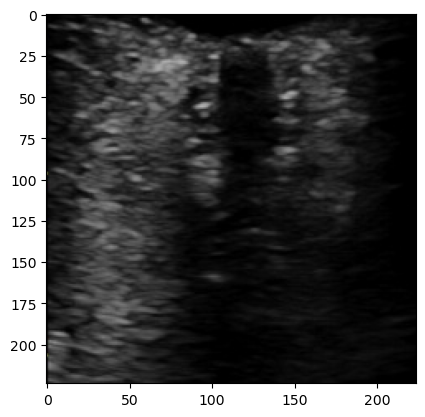

In [7]:
plt.imshow(X_train[9,:,:])
plt.show()

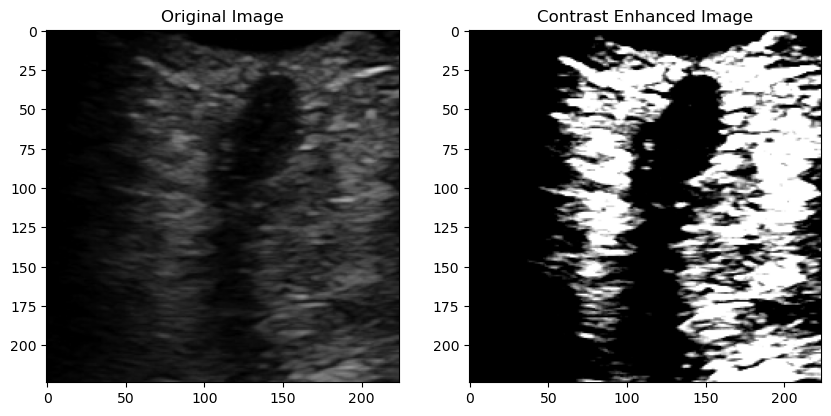

In [8]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt

# Open the image
im = Image.open("C:/Users/abden/OneDrive/Desktop/Projects/Projet S8/Untitled Folder/img_med/Data/dataset/train_test_full_roi/train_data/img_224/img2.png")

# Enhance the contrast
im_filtre = ImageEnhance.Contrast(im).enhance(10)

# Display the images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(im)
axs[0].set_title('Original Image')
axs[1].imshow(im_filtre)
axs[1].set_title('Contrast Enhanced Image')
plt.show()



In [9]:
X_train = []
path_= "C:/Users/abden/OneDrive/Desktop/Projects/Projet S8/Untitled Folder/img_med/Data/dataset/train_test_full_roi/train_data/img_224"
for i in range(1,13):
    path = path_ + '/img{}.png'.format(i)
    im = Image.open(path)
    im_filtre = ImageEnhance.Contrast(im).enhance(100)
    X_train.append(np.array(im_filtre).tolist())

X_train = np.array(X_train)
    
    

In [10]:
path = "C:/Users/abden/OneDrive/Desktop/Projects/Projet S8/Untitled Folder/img_med/Data/dataset/train_test_full_roi/test_data/img_224"
image_names = [path+'/img{}.png'.format(k) for k in range(13,16)]

image_names.sort()
image_names_subset = image_names[0:num_images]
images = [cv2.imread(image, 1) for image in image_names_subset] #SM backbones use 3 channel images, so let us read images in color.
X_test = np.array(images)
X_test = X_test/225

In [11]:
path = "C:/Users/abden/OneDrive/Desktop/Projects/Projet S8/Untitled Folder/img_med/Data/dataset/train_test_full_roi/test_data/msk3c_224"
mask_names = [path+'/img{}_mask2.png'.format(k) for k in range(13,16)]
mask_names.sort()
mask_names_subset = mask_names[0:num_images]
masks = [cv2.imread(mask, 0) for mask in mask_names_subset]
mask_dataset_test = np.array(masks)

In [12]:
proccesed_images = []

for i in range(3):
    img = mask_dataset_test[i,:,:]
  
    # Trouver les indices des pixels qui ont une valeur différente de 255
    indices = np.where(img != 255)

    # Calculer les limites de la zone qui contient les pixels non nuls
    y_min, x_min = np.min(indices, axis=1)
    y_max, x_max = np.max(indices, axis=1)

    # Extraire la zone qui contient les pixels non nuls de l'image
    img = img[y_min:y_max+1, x_min:x_max+1]
    img = cv2.resize(img, (224, 224))
    proccesed_images.append(img)
  
mask_dataset_test=np.array(proccesed_images)

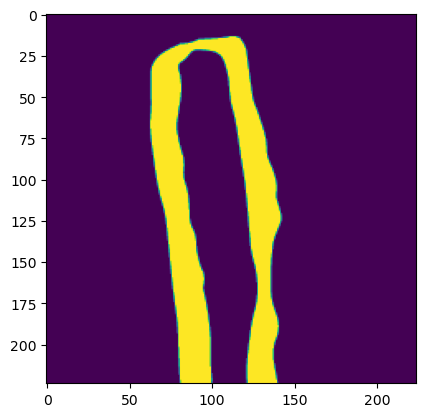

In [14]:
plt.imshow(mask_dataset_test[1,:,:])
plt.show()

In [15]:
X_test = []
path_= "C:/Users/abden/OneDrive/Desktop/Projects/Projet S8/Untitled Folder/img_med/Data/dataset/train_test_full_roi/test_data/img_224"
for i in range(13,16):
    path = path_ + '/img{}.png'.format(i)
    im = Image.open(path)
    im_filtre = ImageEnhance.Contrast(im).enhance(100)
    X_test.append(np.array(im_filtre).tolist())

X_test = np.array(X_test)

In [16]:
#Encode labels to 0, 1, 2, 3, ... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = mask_dataset_train_.shape  
mask_dataset_reshaped = mask_dataset_train_.reshape(-1,1)
mask_dataset_reshaped_encoded = labelencoder.fit_transform(mask_dataset_reshaped)
y_train = mask_dataset_reshaped_encoded.reshape(n, h, w)

n, h, w = mask_dataset_test.shape  
mask_dataset_reshaped = mask_dataset_test.reshape(-1,1)
mask_dataset_reshaped_encoded = labelencoder.fit_transform(mask_dataset_reshaped)
y_test = mask_dataset_reshaped_encoded.reshape(n, h, w)


C:\Users\abden\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\abden\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [17]:

print("Total images in the original dataset are: ", len(image_names))
print("Image train data shape is: ", X_train.shape)
print("Mask train data shape is: ", y_train.shape)
print("Max pixel value in image is: ", X_train.max())
print("Labels in the mask are : ", np.unique(y_train))

Total images in the original dataset are:  3
Image train data shape is:  (12, 224, 224, 3)
Mask train data shape is:  (12, 224, 224)
Max pixel value in image is:  255
Labels in the mask are :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16]


# Feature Extraction with VGG16 , ResNet101  (Transfert Learning)

In [10]:

from keras.models import Model
from keras.applications.vgg16 import VGG16

#Load VGG16 model wothout classifier/fully connected layers
#Load imagenet weights that we are going to use as feature generators
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE_X, SIZE_Y, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
	layer.trainable = False
    
VGG_model.summary()  #Trainable parameters will be 0

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [252]:
len(VGG_model.layers)

19

In [39]:
from keras.models import Model
from keras.layers import Input, Conv2D, UpSampling2D


# Define the input shape
input_shape = (224, 224, 3)

# Get the output of block3_conv3
output = VGG_model.get_layer('block1_conv2').output

# Define the model with the desired input and output layers
new_model = Model(inputs=VGG_model.input, outputs=output)

# Print the model summary
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
Total params: 38,720
Trainable params: 0
Non-trainable params: 38,720
_________________________________________________________________


In [340]:
# Freezing 


from keras.layers import Input, Conv2D, UpSampling2D
from keras.applications.vgg16 import VGG16
from keras.models import Model

# Load VGG16 model without classifier/fully connected layers
# Load imagenet weights that we are going to use as feature generators
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE_X, SIZE_Y, 3))

# Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
    layer.trainable = False

# Add an upsampling layer after the last convolutional block of the VGG model
x = VGG_model.output
# x = UpSampling2D(size=(2,2))(x) 
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D(size=(4,4))(x) 
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D(size=(2,2))(x) 
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D(size=(4, 4))(x)  
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D(size=(2, 2))(x) # upsample by a factor of 2 to get 224x224 output


# Define the output layer
output_layer = Conv2D(1, (1, 1), activation='sigmoid')(x)

# Create a new model with the input layer of VGG model and the output layer we just defined
model = Model(inputs=VGG_model.input, outputs=output_layer)

# Freeze the first 15 layers
for layer in model.layers[:19]:
    layer.trainable = False

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit the model with X_train and y_train
model.fit(X_train, y_train, epochs=10, batch_size=2)
new_model = model

Epoch 1/10
6/6 [==============================] - 6s 383ms/step - loss: -916.6404
Epoch 2/10
6/6 [==============================] - 2s 390ms/step - loss: -1384.1660
Epoch 3/10
6/6 [==============================] - 2s 390ms/step - loss: -1384.1659
Epoch 4/10
6/6 [==============================] - 2s 389ms/step - loss: -1384.1660
Epoch 5/10
6/6 [==============================] - 2s 386ms/step - loss: -1384.1660
Epoch 6/10
6/6 [==============================] - 2s 390ms/step - loss: -1384.1660
Epoch 7/10
6/6 [==============================] - 2s 391ms/step - loss: -1384.1660
Epoch 8/10
6/6 [==============================] - 2s 394ms/step - loss: -1384.1660
Epoch 9/10
6/6 [==============================] - 2s 392ms/step - loss: -1384.1660
Epoch 10/10
6/6 [==============================] - 2s 387ms/step - loss: -1384.1660


In [53]:
# Freezing 2

from keras.layers import Input, Conv2D, UpSampling2D
from keras.applications.vgg16 import VGG16
from keras.models import Model

# Load VGG16 model without classifier/fully connected layers
# Load imagenet weights that we are going to use as feature generators
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE_X, SIZE_Y, 3))

# Get the output of block3_conv3
output = VGG_model.get_layer('block3_conv3').output
# Define the model with the desired input and output layers
VGG_model = Model(inputs=VGG_model.input, outputs=output)

# Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in VGG_model.layers:
    layer.trainable = False

# Add an upsampling layer after the last convolutional block of the VGG model
x = VGG_model.output
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D(size=(2, 2))(x) # upsample by a factor of 2
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D(size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)




# Define the output layer
output_layer = Conv2D(1, (1, 1), activation='sigmoid')(x)

# Create a new model with the input layer of VGG model and the output layer we just defined
model = Model(inputs=VGG_model.input, outputs=output_layer)

print(len(model.layers))

# Freeze the first 15 layers
for layer in model.layers[:10]:
    layer.trainable = False

# Compile the model with binary crossentropy loss and Adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam')

# Fit the model with X_train and y_train
model.fit(X_train, y_train, epochs=10, batch_size=2)
new_model = model

19
Epoch 1/10
6/6 [==============================] - 9s 1s/step - loss: -1158.5651
Epoch 2/10
6/6 [==============================] - 7s 1s/step - loss: -1384.1660
Epoch 3/10
6/6 [==============================] - 7s 1s/step - loss: -1384.1660
Epoch 4/10
6/6 [==============================] - 7s 1s/step - loss: -1384.1660
Epoch 5/10
6/6 [==============================] - 7s 1s/step - loss: -1384.1660
Epoch 6/10
6/6 [==============================] - 7s 1s/step - loss: -1384.1660
Epoch 7/10
6/6 [==============================] - 7s 1s/step - loss: -1384.1660
Epoch 8/10
6/6 [==============================] - 7s 1s/step - loss: -1384.1660
Epoch 9/10
6/6 [==============================] - 7s 1s/step - loss: -1384.1660
Epoch 10/10
6/6 [==============================] - 7s 1s/step - loss: -1384.1661


In [341]:
new_model.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [342]:
from keras.models import Model
from keras.layers import Input, Conv2D, UpSampling2D


# Define the input shape
input_shape = (224, 224, 3)

# Get the output of block3_conv3
output = new_model.get_layer('up_sampling2d_37').output

# Define the model with the desired input and output layers
new_model = Model(inputs=VGG_model.input, outputs=output)

# Print the model summary
new_model.summary()

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [22]:
from keras.models import Model
from keras.layers import Input, Conv2D, UpSampling2D


# Define the input shape
input_shape = (224, 224, 3)

# Get the output of block3_conv3
block3_conv3 = VGG_model.get_layer('block1_conv2').output

# Add an upsampling layer followed by a convolutional layer with 256 filters
# x = UpSampling2D(size=(2, 2))(block3_conv3)
# x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# x = UpSampling2D(size=(2, 2))(x)
# # Define the output of the model
output = block3_conv3

# Define the model with the desired input and output layers
new_model = Model(inputs=VGG_model.input, outputs=output)

# Print the model summary
new_model.summary()


Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
Total params: 38,720
Trainable params: 0
Non-trainable params: 38,720
_________________________________________________________________


In [177]:
from keras.models import Model
from keras.applications import ResNet101

#Load VGG16 model wothout classifier/fully connected layers
#Load imagenet weights that we are going to use as feature generators
resnet_model = ResNet101(weights='imagenet', include_top=False, input_shape=(SIZE_X, SIZE_Y, 3))

#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in resnet_model.layers:
	layer.trainable = False
    
resnet_model.summary()  #Trainable parameters will be 0

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_12[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                          

                                                                                                  
 conv2_block3_1_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_2_conv (Conv2D)   (None, 56, 56, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 56, 56, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv3_block3_1_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_2_conv (Conv2D)   (None, 28, 28, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block2_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization) 

 conv4_block5_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block4_out[0][0]']       
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block5_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_blo

                                                                                                  
 conv4_block8_1_conv (Conv2D)   (None, 14, 14, 256)  262400      ['conv4_block7_out[0][0]']       
                                                                                                  
 conv4_block8_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block8_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block8_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block8_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block8_2_conv (Conv2D)   (None, 14, 14, 256)  590080      ['conv4_block8_1_relu[0][0]']    
          

                                )                                                                 
                                                                                                  
 conv4_block11_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block10_out[0][0]']      
                                                                                                  
 conv4_block11_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block11_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block11_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block11_1_bn[0][0]']     
 on)                                                                                              
                                                                                                  
 conv4_blo

 conv4_block13_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block13_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block14_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block13_out[0][0]']      
                                                                                                  
 conv4_block14_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block14_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block14_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block14_1_bn[0][0]']     
 on)                                                                                              
          

                                                                                                  
 conv4_block16_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block16_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block17_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block16_out[0][0]']      
                                                                                                  
 conv4_block17_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block17_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_block17_1_relu (Activati  (None, 14, 14, 256)  0          ['conv4_block17_1_bn[0][0]']     
 on)      

                                )                                 'conv4_block19_3_bn[0][0]']     
                                                                                                  
 conv4_block19_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block19_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block20_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block19_out[0][0]']      
                                                                                                  
 conv4_block20_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block20_1_conv[0][0]']   
 lization)                                                                                        
                                                                                                  
 conv4_blo

 conv4_block22_add (Add)        (None, 14, 14, 1024  0           ['conv4_block21_out[0][0]',      
                                )                                 'conv4_block22_3_bn[0][0]']     
                                                                                                  
 conv4_block22_out (Activation)  (None, 14, 14, 1024  0          ['conv4_block22_add[0][0]']      
                                )                                                                 
                                                                                                  
 conv4_block23_1_conv (Conv2D)  (None, 14, 14, 256)  262400      ['conv4_block22_out[0][0]']      
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, 14, 14, 256)  1024       ['conv4_block23_1_conv[0][0]']   
 lization)                                                                                        
          

 conv5_block2_3_bn (BatchNormal  (None, 7, 7, 2048)  8192        ['conv5_block2_3_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv5_block2_add (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_block2_out (Activation)  (None, 7, 7, 2048)   0           ['conv5_block2_add[0][0]']       
                                                                                                  
 conv5_block3_1_conv (Conv2D)   (None, 7, 7, 512)    1049088     ['conv5_block2_out[0][0]']       
                                                                                                  
 conv5_blo

In [237]:
from keras.models import Model
from keras.layers import Input, Conv2D, UpSampling2D


# Define the input shape
input_shape = (224, 224, 3)

# Get the output of block3_conv3
block_output = resnet_model.get_layer('conv2_block2_out').output

# Add an upsampling layer followed by a convolutional layer with 256 filters
x = UpSampling2D(size=(2, 2))(block_output)
x = UpSampling2D(size=(2, 2))(x)

x = Conv2D(256, (3, 3), activation='relu', padding='same')(x)
# Define the output of the model
output = x

# Define the model with the desired input and output layers
new_model = Model(inputs=resnet_model.input, outputs=output)

# Print the model summary
new_model.summary()
    


Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_12[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

 )                              6)                                                                
                                                                                                  
 conv2d_53 (Conv2D)             (None, 224, 224, 25  590080      ['up_sampling2d_25[0][0]']       
                                6)                                                                
                                                                                                  
Total params: 748,288
Trainable params: 590,080
Non-trainable params: 158,208
__________________________________________________________________________________________________


In [40]:
#Now, let us apply feature extractor to our training data
features = new_model.predict(X_train)

1/1 [==============================] - 0s 201ms/step


In [41]:
features.shape

(12, 224, 224, 64)

In [42]:
#Reassign 'features' as X to make it easy to follow
X=features
X = X.reshape(-1, X.shape[3])  #Make it compatible for Random Forest and match Y labels
print(X.shape)

(602112, 64)


In [43]:
#Reshape Y to match X
Y = y_train.reshape(-1)
print(Y.shape)

(602112,)


In [16]:
np.unique(Y)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52], dtype=int64)

In [348]:
# !apt-get update
# !apt-get install cuda

In [356]:
import xgboost as xgb
model = xgb.XGBClassifier(n_estimators = 5)  #Define gpu_id, otherwise it uses CPU and computation would be very slow , tree_method='gpu_hist', gpu_id=0. 

In [357]:
# Train the model on training data
model.fit(X, Y) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=5, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [358]:
X_test_features=new_model.predict(X_test)
X_test_features=X_test_features.reshape(-1, X_test_features.shape[3])
print(X_test_features.shape)

1/1 [==============================] - 0s 432ms/step
(150528, 32)


In [359]:
y_pred = model.predict(X_test_features)
print(y_pred.shape)

(150528,)


In [360]:
ground_truth = y_test.reshape(-1)
print(ground_truth.shape)

(150528,)


In [361]:
#Pixel accuracy - not a good metric for semantic segmentation
#Print overall accuracy
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(ground_truth, y_pred))

Accuracy =  1.328656462585034e-05


In [18]:
import random
img_number = random.randint(0, len(X_test)-1)
img = X_test[img_number]
img=np.expand_dims(img, axis=0)

img_features=new_model.predict(img)
img_features = img_features.reshape(-1, img_features.shape[3])
mask = y_test[img_number]

prediction = model.predict(img_features)
predicted_mask = prediction.reshape(mask.shape[0], mask.shape[1])

plt.figure(figsize=(12, 8))
plt.subplot(231)
plt.title('Image')
plt.imshow(img[0], cmap='gray')
plt.subplot(232)
plt.title('Mask')
plt.imshow(mask)
plt.subplot(233)
plt.title('Prediction')
plt.imshow(predicted_mask)
plt.show()

# Segmentation using extracted features with clustering algorithms

In [44]:
import pandas as pd
import numpy as np



# reshape the 3D array to a 2D array where each row represents a pixel and each column represents a feature
df_data = features[3,:,:,:].reshape((224*224, 64))

# create a dataframe with the reshaped data and use tuples of (i,j) as the index
df = pd.DataFrame(df_data, index=[(i, j) for i in range(224) for j in range(224)])


In [45]:
df

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
"(0, 0)",0.000000,0.000000,0.643095,0.967406,4.651551,0.000000,0.417982,0.045283,0.0,1.063376,...,0.039788,1.038772,1.434376,0.329785,0.000000,0.932531,2.011054,0.658673,0.316307,1.510487
"(0, 1)",0.459174,0.000000,0.940372,1.486705,7.025357,0.000000,0.051651,0.120270,0.0,1.440766,...,0.000000,2.218610,2.800605,0.440690,0.213791,1.288219,2.968148,1.408847,0.943172,1.828420
"(0, 2)",0.477199,0.000000,0.931085,1.532009,7.103302,0.000000,0.243308,0.109865,0.0,1.479566,...,0.000000,2.290842,2.681033,0.715038,0.071721,0.928650,2.975396,1.437297,1.148257,1.765498
"(0, 3)",0.547406,0.000000,0.916024,1.608652,7.231346,0.000000,0.458996,0.102993,0.0,1.509224,...,0.000000,2.259851,2.451043,1.158512,0.000000,0.424772,2.987508,1.476809,1.486392,1.686784
"(0, 4)",0.506149,0.000000,0.903055,1.687365,7.419579,0.000000,0.641818,0.098876,0.0,1.535528,...,0.000000,1.980555,2.082668,1.720254,0.000000,0.000000,3.000841,1.520112,1.864358,1.603148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(223, 219)",1.527037,2.519594,1.095870,1.743851,5.028722,1.983423,0.995149,0.000000,0.0,1.554998,...,0.000000,0.946926,0.771392,0.922578,1.227128,1.731694,2.935346,2.264333,0.538848,0.000000
"(223, 220)",1.594580,2.574559,1.097078,1.752627,5.016654,2.002720,0.971225,0.000000,0.0,1.570296,...,0.000000,0.967582,0.796248,0.964887,1.195491,1.692005,2.927357,2.278473,0.504918,0.000000
"(223, 221)",1.577584,2.592195,1.099998,1.755728,5.016301,1.989321,0.973464,0.000000,0.0,1.575179,...,0.000000,0.986453,0.788777,1.016288,1.147660,1.634728,2.924033,2.286583,0.505528,0.000000
"(223, 222)",1.587702,2.603497,1.101381,1.759887,5.018994,1.996755,0.961155,0.000000,0.0,1.578048,...,0.000000,0.976449,0.779782,1.055809,1.130017,1.584158,2.922555,2.292804,0.504110,0.000000


In [46]:
import numpy as np
import pandas as pd


# compute the L1 norm of each row
norms = np.linalg.norm(df, ord=1, axis=1)

# normalize each row by dividing by its L1 norm
df = df.div(norms, axis=0)

df



,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
"(0, 0)",0.000000,0.000000,0.010176,0.015308,0.073605,0.000000,0.006614,0.000717,0.0,0.016827,...,0.000630,0.016437,0.022697,0.005218,0.000000,0.014756,0.031823,0.010423,0.005005,0.023902
"(0, 1)",0.005150,0.000000,0.010546,0.016673,0.078788,0.000000,0.000579,0.001349,0.0,0.016158,...,0.000000,0.024881,0.031408,0.004942,0.002398,0.014447,0.033287,0.015800,0.010577,0.020505
"(0, 2)",0.005295,0.000000,0.010331,0.016999,0.078817,0.000000,0.002700,0.001219,0.0,0.016417,...,0.000000,0.025419,0.029748,0.007934,0.000796,0.010304,0.033014,0.015948,0.012741,0.019590
"(0, 3)",0.005990,0.000000,0.010023,0.017602,0.079124,0.000000,0.005022,0.001127,0.0,0.016514,...,0.000000,0.024727,0.026819,0.012676,0.000000,0.004648,0.032689,0.016159,0.016264,0.018457
"(0, 4)",0.005450,0.000000,0.009724,0.018169,0.079890,0.000000,0.006911,0.001065,0.0,0.016534,...,0.000000,0.021325,0.022425,0.018523,0.000000,0.000000,0.032311,0.016368,0.020074,0.017262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"(223, 219)",0.017681,0.029173,0.012688,0.020191,0.058225,0.022965,0.011522,0.000000,0.0,0.018004,...,0.000000,0.010964,0.008932,0.010682,0.014208,0.020050,0.033987,0.026218,0.006239,0.000000
"(223, 220)",0.018433,0.029761,0.012682,0.020260,0.057991,0.023151,0.011227,0.000000,0.0,0.018152,...,0.000000,0.011185,0.009204,0.011154,0.013819,0.019559,0.033839,0.026338,0.005837,0.000000
"(223, 221)",0.018249,0.029985,0.012724,0.020309,0.058026,0.023012,0.011261,0.000000,0.0,0.018221,...,0.000000,0.011411,0.009124,0.011756,0.013276,0.018910,0.033824,0.026450,0.005848,0.000000
"(223, 222)",0.018373,0.030129,0.012746,0.020366,0.058081,0.023107,0.011123,0.000000,0.0,0.018262,...,0.000000,0.011300,0.009024,0.012218,0.013077,0.018332,0.033821,0.026533,0.005834,0.000000


In [47]:
X=df.values

In [48]:
np.sum(X[0,:])


0.99999994

In [49]:
import numpy as np
from sklearn.decomposition import PCA

pca = PCA(n_components = 35)
pca.fit(X)
X_reduced  = pca.transform(X)

X_reduced



array([[-2.19687149e-02,  1.12250797e-03,  1.84394408e-03, ...,
         1.04964944e-03,  4.72834939e-03,  2.08691508e-03],
       [-1.71247981e-02,  2.85430322e-03, -1.09144663e-02, ...,
         3.05067981e-04,  1.01708039e-03,  7.13870395e-05],
       [-1.54280895e-02,  7.00338371e-03, -1.73159093e-02, ...,
         4.52905428e-04,  1.39599934e-03,  1.12587586e-04],
       ...,
       [ 4.35723690e-03, -1.73251797e-02,  2.01397832e-03, ...,
         3.08891758e-04,  5.63498877e-04, -6.39448990e-04],
       [ 4.98521421e-03, -1.77110415e-02,  1.65504590e-03, ...,
         3.53010371e-04,  5.97333594e-04, -6.64559542e-04],
       [ 7.02634640e-03, -1.89502556e-02, -1.73188224e-02, ...,
        -5.63461334e-04,  1.01072574e-03, -2.70034256e-03]], dtype=float32)

In [50]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=4, random_state=0, n_init="auto", init = "k-means++").fit(X)
kmeans.labels_


#Initialize with the true centers of the regions !



array([1, 1, 1, ..., 1, 1, 1])

In [51]:
kmeans.labels_.sum()

63985

In [52]:
Matr_image = [[0]*224 for i in range(224)]
k = 0
for i in range(224):
  for j in range(224):
    if kmeans.labels_[k] == 0:
      Matr_image[i][j] = np.array([0,0,0])
    if kmeans.labels_[k] == 1:
      Matr_image[i][j] = np.array([255,255,255])
    if kmeans.labels_[k] == 2:
      Matr_image[i][j] = np.array([0,255,0])
    if kmeans.labels_[k] == 3:
      Matr_image[i][j] = np.array([255,0,0])
    

    
    k += 1


Matr_image = np.array(Matr_image)




    



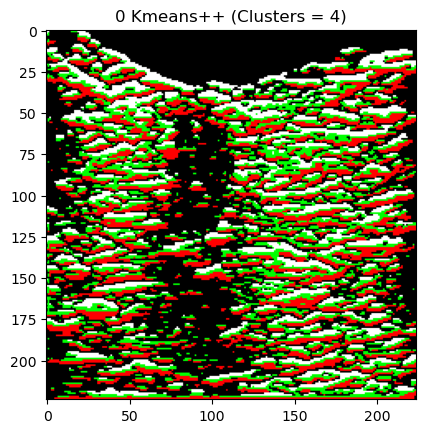

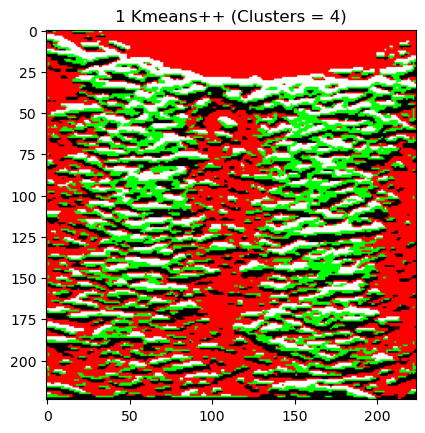

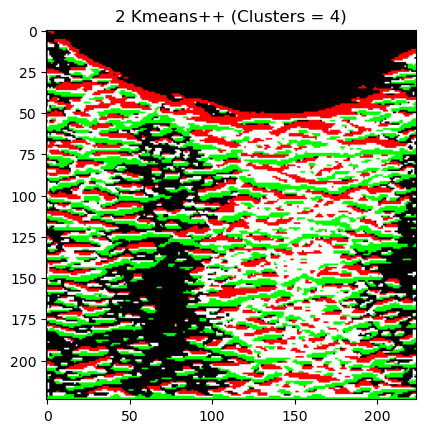

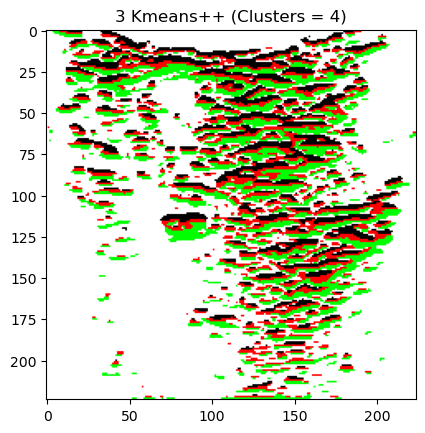

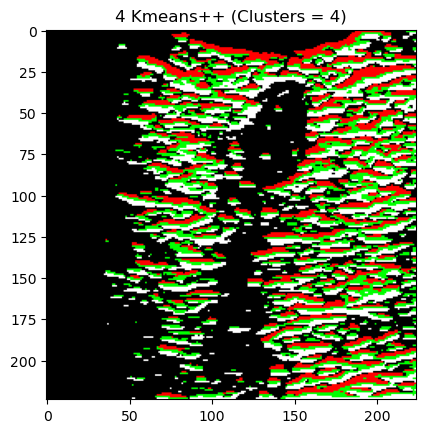

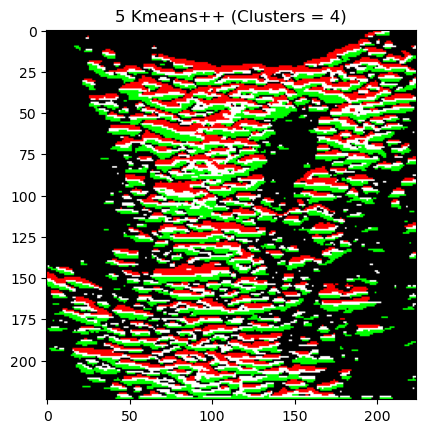

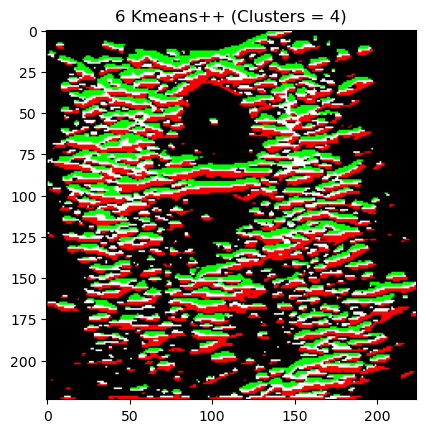

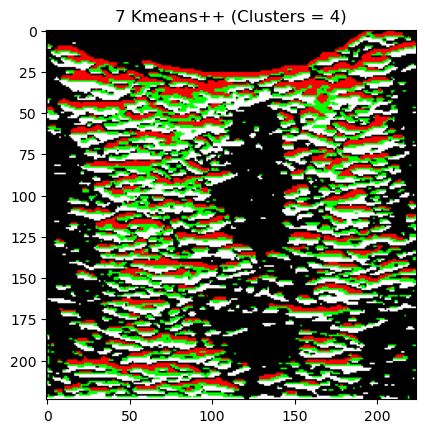

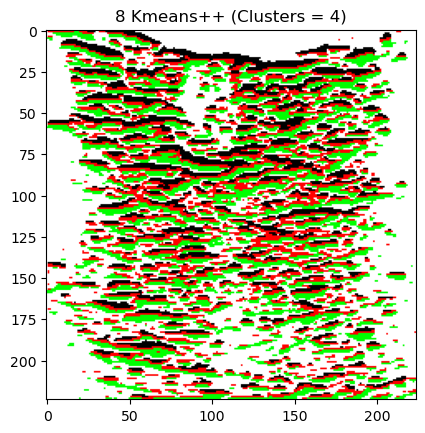

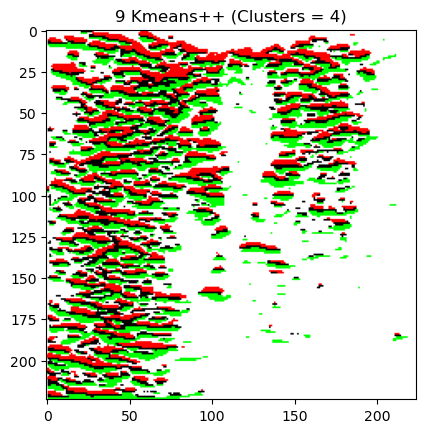

In [56]:
for t in range(10):
  # reshape the 3D array to a 2D array where each row represents a pixel and each column represents a feature
  df_data = features[t,:,:,:].reshape((224*224, 64))
  df = pd.DataFrame(df_data, index=[(i, j) for i in range(224) for j in range(224)])
  norms = np.linalg.norm(df, ord=1, axis=1)
  # normalize each row by dividing by its L1 norm
  df = df.div(norms, axis=0)
  X=df.values
  pca = PCA(n_components = 35)
  pca.fit(X)
  X_reduced  = pca.transform(X)
  n=4
  kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto", init = "k-means++").fit(X_reduced)

  Matr_image = [[0]*224 for i in range(224)]
  k = 0
  for i in range(224):
    for j in range(224):
      if kmeans.labels_[k] == 0:
        Matr_image[i][j] = np.array([0,0,0])
      if kmeans.labels_[k] == 1:
        Matr_image[i][j] = np.array([255,255,255])
      if kmeans.labels_[k] == 2:
        Matr_image[i][j] = np.array([0,255,0])
      if kmeans.labels_[k] == 3:
        Matr_image[i][j] = np.array([255,0,0])
      k += 1
  Matr_image = np.array(Matr_image)
  # Load the RGB image array
  image = Matr_image
  # Plot the RGB image
  plt.imshow(image)
  plt.title('{} Kmeans++'.format(t) + ' (Clusters = {})'.format(n))
  plt.show()
  
      





C:\Users\abden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


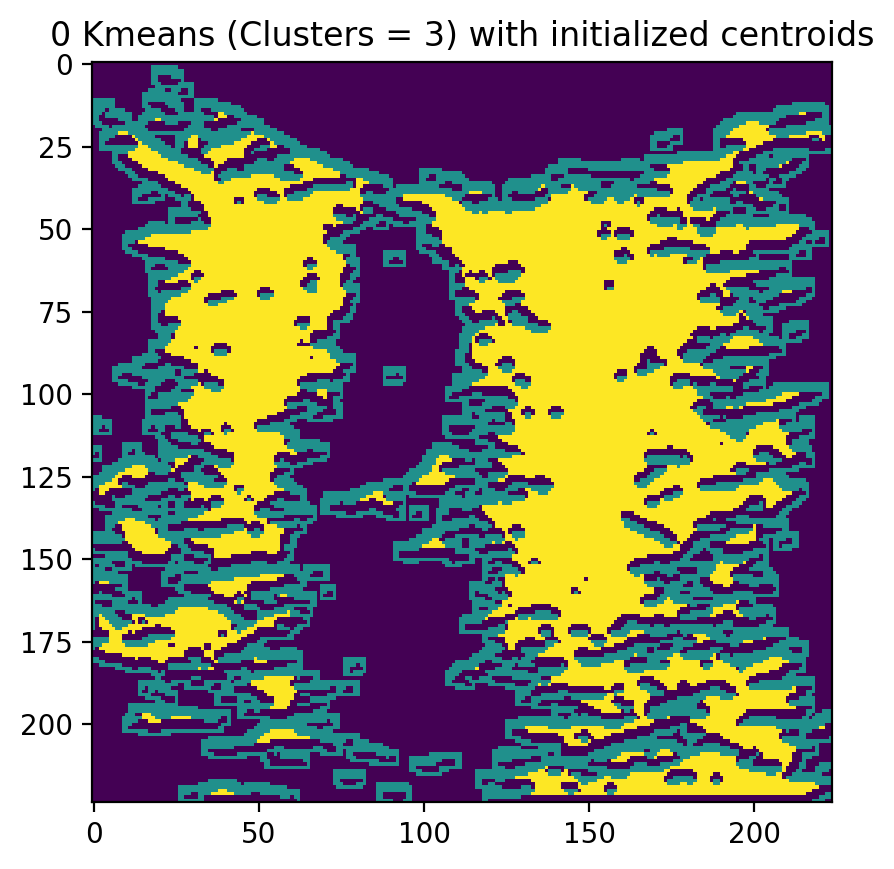

C:\Users\abden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


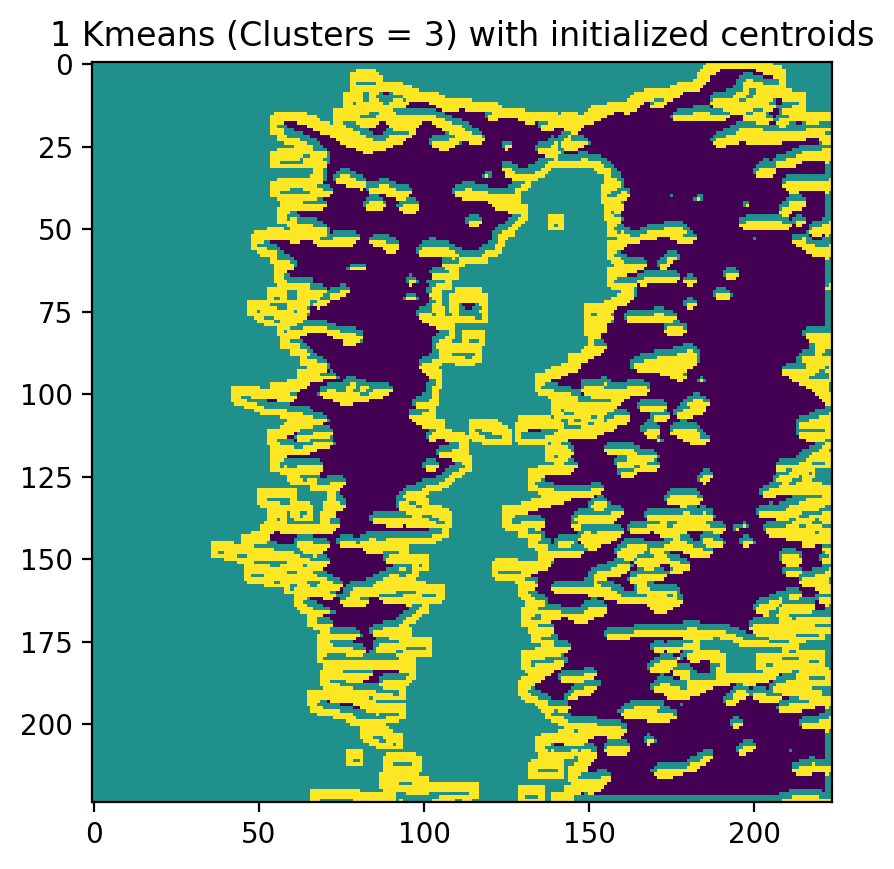

C:\Users\abden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


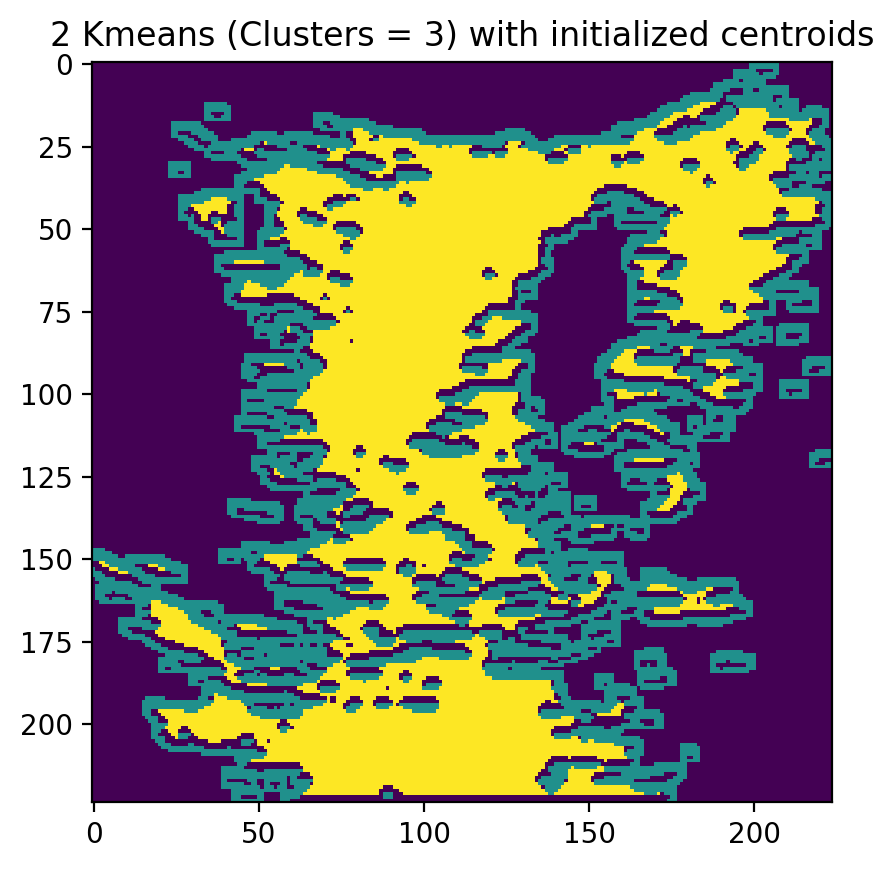

C:\Users\abden\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1362: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  super()._check_params_vs_input(X, default_n_init=10)


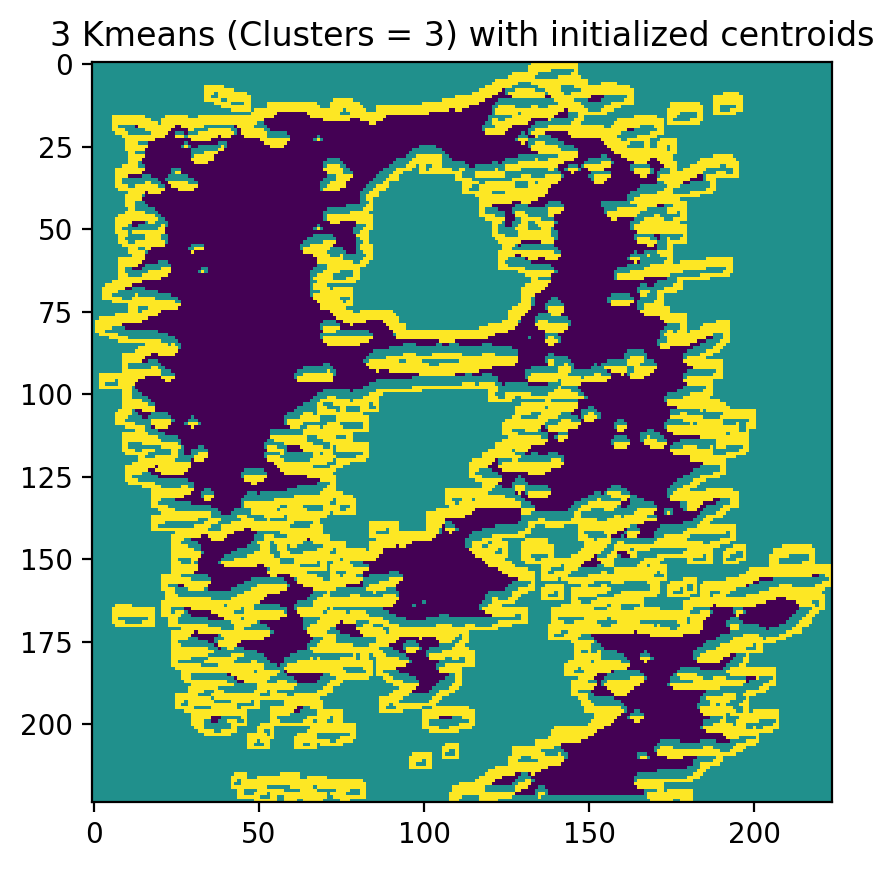

In [187]:
for t in range(4):
  # reshape the 3D array to a 2D array where each row represents a pixel and each column represents a feature
  df_data = features[t,:,:,:].reshape((224*224, 64))
  df = pd.DataFrame(df_data, index=[(i, j) for i in range(224) for j in range(224)])
  norms = np.linalg.norm(df, ord=1, axis=1)
  # normalize each row by dividing by its L1 norm
  df = df.div(norms, axis=0)
  X=df.values
  pca = PCA(n_components = 2)
  pca.fit(X)
  X_reduced  = pca.transform(X)
  n=3
  centroids4 = [[100,20],[90,125],[170,100],[40,125]]
  centroids3 = [[90,125],[170,100],[40,125]]
  centroids2 = [[90,125],[170,100]]
  kmeans = KMeans(n_clusters=n, random_state=0, n_init="auto", init = centroids3).fit(X_reduced)
  

  Matr_image = [[0]*224 for i in range(224)]
  image = np.reshape(kmeans.labels_,(224,224))
  plt.imshow(image)
  plt.title('{} Kmeans'.format(t) + ' (Clusters = {})'.format(n) + ' with initialized centroids')
  plt.show()
  

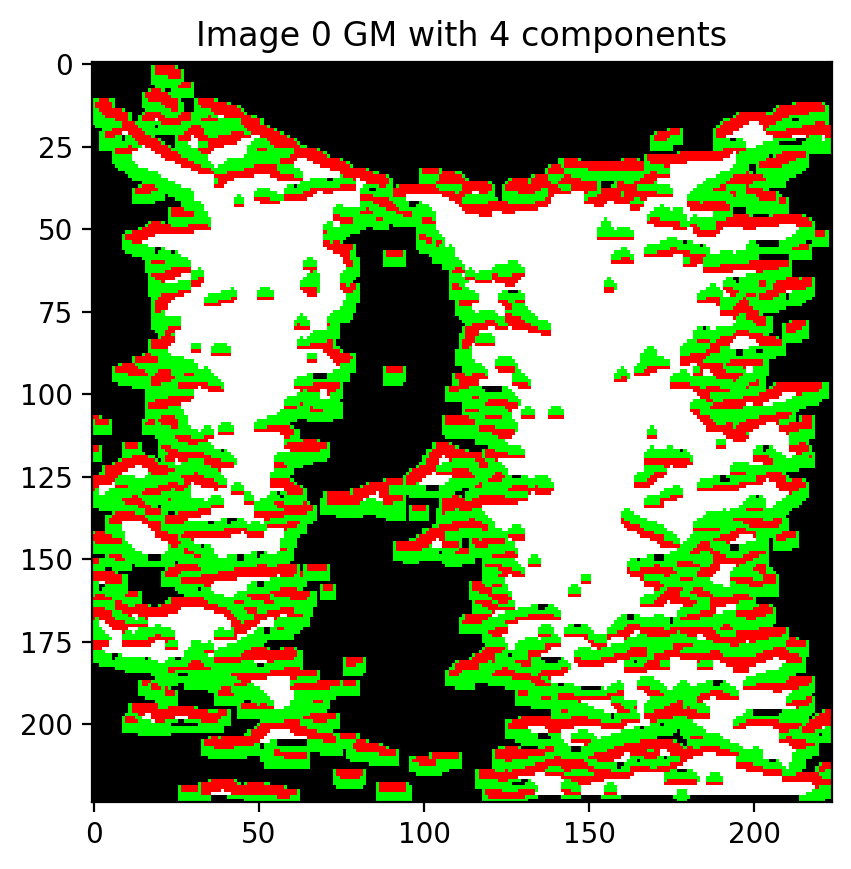

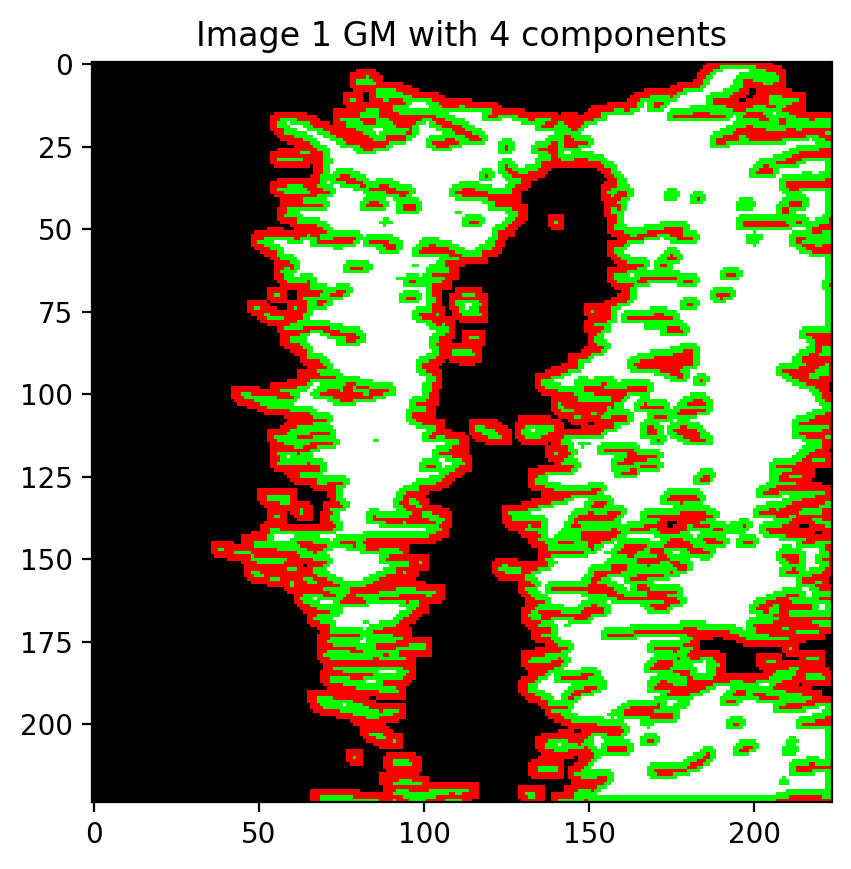

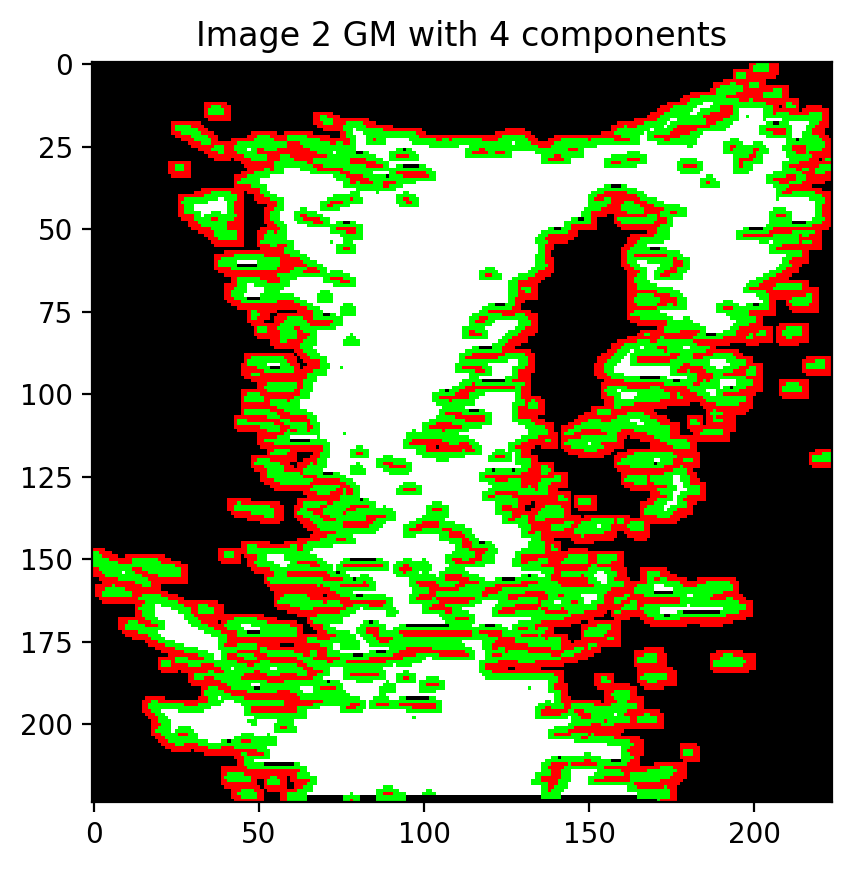

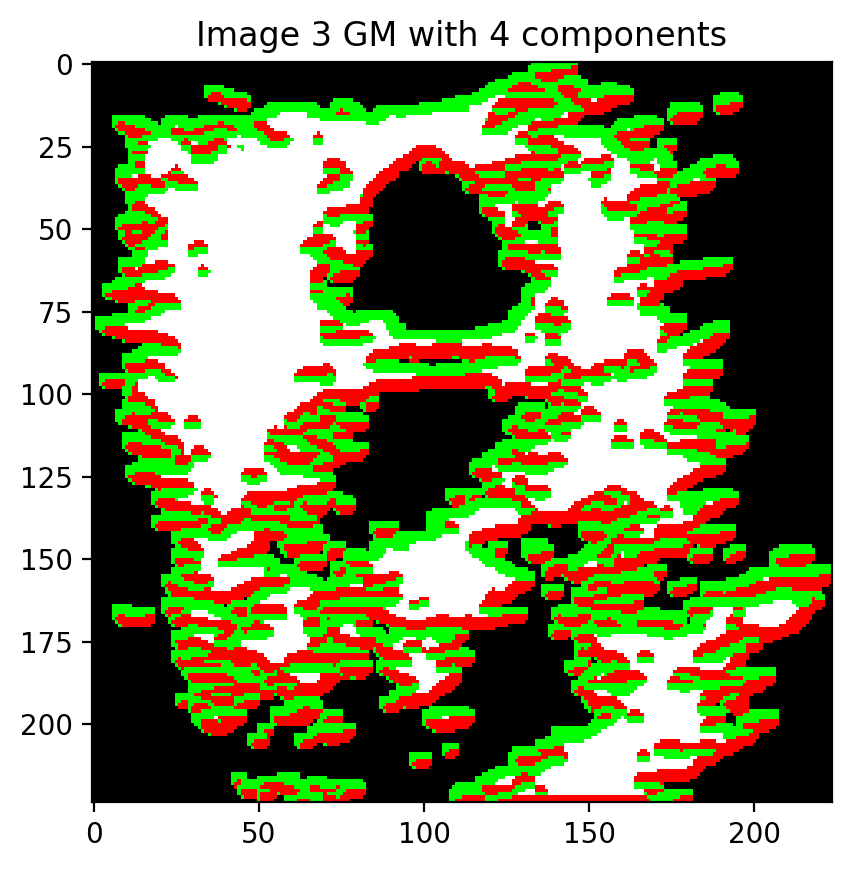

In [188]:
from sklearn.mixture import GaussianMixture
for t in range(4):
  # reshape the 3D array to a 2D array where each row represents a pixel and each column represents a feature
  df_data = features[t,:,:,:].reshape((224*224, 64))
  df = pd.DataFrame(df_data, index=[(i, j) for i in range(224) for j in range(224)])
  norms = np.linalg.norm(df, ord=1, axis=1)
  # normalize each row by dividing by its L1 norm
  df = df.div(norms, axis=0)
  X=df.values
  pca = PCA(n_components = 2)
  pca.fit(X)
  X_reduced  = pca.transform(X)
  n_components = 4
  gm = GaussianMixture(n_components, random_state=0, init_params='k-means++').fit(X)
  labels = gm.predict(X)

  labels=list(labels)
  counter = Counter(labels)
  most_common = [num for num, count in counter.most_common()]  

  Matr_image = [[0]*224 for i in range(224)]
  k = 0
  for i in range(224):
    for j in range(224):
      if labels[k] == most_common[0]:
        Matr_image[i][j] = np.array([0,0,0])
      if labels[k] == most_common[1]:
        Matr_image[i][j] = np.array([255,255,255])
      if labels[k] == most_common[2]:
        Matr_image[i][j] = np.array([0,255,0])
      if labels[k] == most_common[3]:
        Matr_image[i][j] = np.array([255,0,0])
      k += 1
  Matr_image = np.array(Matr_image)
  # Load the RGB image array
  image = Matr_image
  # Plot the RGB image
  plt.imshow(image)
  plt.title('Image {}'.format(t) + ' GM with {} components'.format(n_components) )
  plt.show()